In [38]:
import os
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.ndimage import gaussian_filter
import pickle
from reservoirpy.nodes import Reservoir, Ridge
from sklearn.metrics import mean_absolute_error

In [39]:
with open('new_5slices.pickle', 'rb') as handle:
    slices_5 = pickle.load(handle)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from scipy.ndimage import gaussian_filter

In [41]:
slices_5

{'231201_1': {100: [[array([0., 0., 0., ..., 0., 0., 0.]),
    array([-5.09322982, -5.09388651, -5.09451558, ..., -5.05269978,
           -5.05269979, -5.0526998 ])]],
  200: [[array([0., 0., 0., ..., 0., 0., 0.]),
    array([-5.03512123, -5.03567078, -5.03621292, ..., -5.01651161,
           -5.01651162, -5.01651163])]],
  300: [[array([0., 0., 0., ..., 0., 0., 0.]),
    array([-5.04521841, -5.04727739, -5.04928239, ..., -4.99391045,
           -4.99391046, -4.99391046])]],
  400: [[array([0., 0., 0., ..., 0., 0., 0.]),
    array([-4.98105117, -4.98133259, -4.98160914, ..., -4.98849432,
           -4.98849434, -4.98849436])]],
  500: [[array([0., 0., 0., ..., 0., 0., 0.]),
    array([-4.99925853, -4.99972033, -5.00016012, ..., -4.97887811,
           -4.97887807, -4.97887804])]],
  600: [[array([0., 0., 0., ..., 0., 0., 0.]),
    array([-4.93408924, -4.93342416, -4.93278375, ..., -4.96697375,
           -4.96697375, -4.96697375])]],
  700: [[array([0., 0., 0., ..., 0., 0., 0.]),
    a

In [5]:
size=200
connectivity=0.5
num=7

In [38]:
grid_leakage = np.linspace(0.01, 1, 25)
grid_sr = np.linspace(0.1, 5, 25)

In [39]:
grid_leakage

array([0.01   , 0.05125, 0.0925 , 0.13375, 0.175  , 0.21625, 0.2575 ,
       0.29875, 0.34   , 0.38125, 0.4225 , 0.46375, 0.505  , 0.54625,
       0.5875 , 0.62875, 0.67   , 0.71125, 0.7525 , 0.79375, 0.835  ,
       0.87625, 0.9175 , 0.95875, 1.     ])

In [40]:
grid_sr

array([0.1       , 0.30416667, 0.50833333, 0.7125    , 0.91666667,
       1.12083333, 1.325     , 1.52916667, 1.73333333, 1.9375    ,
       2.14166667, 2.34583333, 2.55      , 2.75416667, 2.95833333,
       3.1625    , 3.36666667, 3.57083333, 3.775     , 3.97916667,
       4.18333333, 4.3875    , 4.59166667, 4.79583333, 5.        ])

In [11]:
slices=[]
for name in slices_5.keys():
    mouse=[]
    for amp in [100,200,300,400,500,600,700,800,900,1000]:
        mouse.append(slices_5[name][amp][0])
    slices.append(mouse)

In [42]:
slice

[[array([0., 0., 0., ..., 0., 0., 0.]),
  array([-0.99362598, -0.99364776, -0.99366796, ..., -0.98776796,
         -0.98776795, -0.98776795])],
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([-1.03097786, -1.03155645, -1.03211906, ..., -1.03213175,
         -1.03213176, -1.03213176])],
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([-1.01823382, -1.01870289, -1.01915872, ..., -1.02300752,
         -1.02300751, -1.02300751])],
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([-1.02511923, -1.02480075, -1.02449122, ..., -1.03918438,
         -1.03918437, -1.03918435])],
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([-1.02834729, -1.02831029, -1.02827471, ..., -1.04373233,
         -1.04373232, -1.04373232])],
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([-1.10787369, -1.1074258 , -1.10698948, ..., -1.09863957,
         -1.0986396 , -1.09863962])],
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([-1.09258172, -1.09214805, -1.09173038, ..., -1.09540998,
         -1.09540998, -1.09540

In [43]:
for slice in slices:
    for amplitude in slice:
        print(amplitude)

[array([0., 0., 0., ..., 0., 0., 0.]), array([-5.09322982, -5.09388651, -5.09451558, ..., -5.05269978,
       -5.05269979, -5.0526998 ])]
[array([0., 0., 0., ..., 0., 0., 0.]), array([-5.03512123, -5.03567078, -5.03621292, ..., -5.01651161,
       -5.01651162, -5.01651163])]
[array([0., 0., 0., ..., 0., 0., 0.]), array([-5.04521841, -5.04727739, -5.04928239, ..., -4.99391045,
       -4.99391046, -4.99391046])]
[array([0., 0., 0., ..., 0., 0., 0.]), array([-4.98105117, -4.98133259, -4.98160914, ..., -4.98849432,
       -4.98849434, -4.98849436])]
[array([0., 0., 0., ..., 0., 0., 0.]), array([-4.99925853, -4.99972033, -5.00016012, ..., -4.97887811,
       -4.97887807, -4.97887804])]
[array([0., 0., 0., ..., 0., 0., 0.]), array([-4.93408924, -4.93342416, -4.93278375, ..., -4.96697375,
       -4.96697375, -4.96697375])]
[array([0., 0., 0., ..., 0., 0., 0.]), array([-4.96061432, -4.95964372, -4.95870005, ..., -4.96749037,
       -4.96749038, -4.96749039])]
[array([0., 0., 0., ..., 0., 0., 0

In [44]:
maes_200_new={}
for name in slices_5.keys():
    maes_200_new[name]=[]

In [1]:
for slice, name in zip(slices, list(slices_5.keys())):
    for sr_exp in grid_sr:
        for lr_exp in grid_leakage:
            res = Reservoir(size, sr = sr_exp, lr=lr_exp, rc_connectivity = connectivity)
            ridge=Ridge() 
            print(name)
            print(sr_exp, lr_exp)
            maes=[]
            for amplitude in mouse:
                res.reset()
                states = res.run(np.reshape(amplitude[0], (-1, 1)))
                ridge.fit(states, np.reshape(amplitude[1], (-1, 1)))
            
                output = ridge.run(states)
                maes.append(np.array([sr_exp, lr_exp, mean_absolute_error(output, amplitude[1])]))
            maes_200_new[name].append(np.array([sr_exp, lr_exp, np.mean(maes)]))
            with open('maes_200_new.pickle', 'wb') as handle:
                pickle.dump(maes_200_new, handle)

NameError: name 'slices' is not defined

In [17]:
names = list(maes_200.keys())

In [15]:
for name in names:
    print(len(maes_200[name]))

625
625
625
625
625


In [14]:
names = list(maes_100.keys())

In [79]:
for name in names:
    print(len(maes_100[name]))

625
625
625
625
625


In [81]:
grid_leakage

array([0.01   , 0.05125, 0.0925 , 0.13375, 0.175  , 0.21625, 0.2575 ,
       0.29875, 0.34   , 0.38125, 0.4225 , 0.46375, 0.505  , 0.54625,
       0.5875 , 0.62875, 0.67   , 0.71125, 0.7525 , 0.79375, 0.835  ,
       0.87625, 0.9175 , 0.95875, 1.     ])

In [6]:
file = open('maes_50.pickle', 'rb')
maes_50=pickle.load(file) 
file = open('maes_100.pickle', 'rb')
maes_100=pickle.load(file)
file = open('maes_200.pickle', 'rb')
maes_200=pickle.load(file)

In [7]:
maes_200['231201_1']==maes_100['231201_1']

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [13]:
n_points = 10000
y_range = (0, 1)  # range for x values
x_range = (1, 5)  # range for y values

In [14]:
def get_plot(x,y,z):
    nbins = 50
    # Calculate the 2D histogram
    hist, x_edges, y_edges, _ = binned_statistic_2d(x, y, z, statistic='mean', bins=nbins, range=[x_range, y_range])
    
    # Set the base value of the histogram to 0
    hist[np.isnan(hist)] = 0
    
    # Apply a Gaussian filter to the histogram
    sigma = 3  # standard deviation for Gaussian kernel
    hist = gaussian_filter(hist, sigma=sigma)
    return hist

In [26]:
#for name in maes_50.keys():
#fig, axs = plt.subplots(4, 5, figsize=(50, 40), subplot_kw=dict(projection='3d'))
fig = plt.figure(figsize=(80,60), dpi=300)
#fig.suptitle('A tale of 4 subplots')
ax = fig.add_subplot(4, 5, 1)
#ax.plot(slices[0][0][0], linewidth=3)
num_plot=1
for i in range(5):
    ax = fig.add_subplot(4, 5, (i+1)*num_plot)
    ax.plot(slices[i][1][1], linewidth=3)
    ax.xaxis.set_tick_params(labelsize=25)
    ax.yaxis.set_tick_params(labelsize=25)
    
    ax = fig.add_subplot(4, 5, (i+1)*num_plot+5)
    im = ax.imshow(get_plot(np.transpose(maes_50[names[i]])[0], np.transpose(maes_50[names[i]])[1], np.transpose(maes_50[names[i]])[2]).T*(-1), origin='lower', extent=[1, 5, -1.5, 2.5])
    ax.set_yticks(ticks=np.arange(-1.5, 2.5+0.8, step=0.8), labels=[0,0.2,0.4,0.6,0.8,1])
    cbar = fig.colorbar(im, ax=ax)
    ax.xaxis.set_tick_params(labelsize=25)
    ax.yaxis.set_tick_params(labelsize=25)
    cbar.ax.tick_params(labelsize=25) 
    ax.set_xlabel("Spectral radius", fontsize=25)
    ax.set_ylabel("Leakage", fontsize=25)
    ax.set_title("size 50, connectivity 0.5", fontsize=25)

    ax = fig.add_subplot(4, 5, (i+1)*num_plot+10)
    im = ax.imshow(get_plot(np.transpose(maes_100[names[i]])[0], np.transpose(maes_100[names[i]])[1], np.transpose(maes_100[names[i]])[2]).T*(-1), origin='lower', extent=[1, 5, -1.5, 2.5])
    ax.set_yticks(ticks=np.arange(-1.5, 2.5+0.8, step=0.8), labels=[0,0.2,0.4,0.6,0.8,1])
    cbar = fig.colorbar(im, ax=ax)
    ax.xaxis.set_tick_params(labelsize=25)
    ax.yaxis.set_tick_params(labelsize=25)
    cbar.ax.tick_params(labelsize=25) 
    ax.set_xlabel("Spectral radius", fontsize=25)
    ax.set_ylabel("Leakage", fontsize=25)
    #ax.plot_trisurf(maes_100[3][0], maes_100[3][1], maes_100[3][2], cmap='plasma')
    #ax.plot_trisurf(maes_50[3][0], maes_50[3][1], maes_50[3][2], cmap='plasma')
    ax.set_title("size 100, connectivity 0.5", fontsize=25)


    ax = fig.add_subplot(4, 5, (i+1)*num_plot+15)
    im = ax.imshow(get_plot(np.transpose(maes_200[names[i]])[0], np.transpose(maes_200[names[i]])[1], np.transpose(maes_100[names[i]])[2]).T*(-1), origin='lower', extent=[1, 5, -1.5, 2.5])
    ax.set_yticks(ticks=np.arange(-1.5, 2.5+0.8, step=0.8), labels=[0,0.2,0.4,0.6,0.8,1])
    cbar = fig.colorbar(im, ax=ax)
    ax.xaxis.set_tick_params(labelsize=25)
    ax.yaxis.set_tick_params(labelsize=25)
    cbar.ax.tick_params(labelsize=25) 
    ax.set_xlabel("Spectral radius", fontsize=25)
    ax.set_ylabel("Leakage", fontsize=25)
    #ax.plot_trisurf(maes_100[3][0], maes_100[3][1], maes_100[3][2], cmap='plasma')
    #ax.plot_trisurf(maes_50[3][0], maes_50[3][1], maes_50[3][2], cmap='plasma')
    ax.set_title("size 200, connectivity 0.5", fontsize=25)
    #print(np.transpose(maes_50[names[i]])[2].T*(-1) == np.transpose(maes_100[names[i]])[2].T*(-1))


fig.savefig("5_slices.pdf", bbox_inches='tight')

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

-0.0009614129897844475


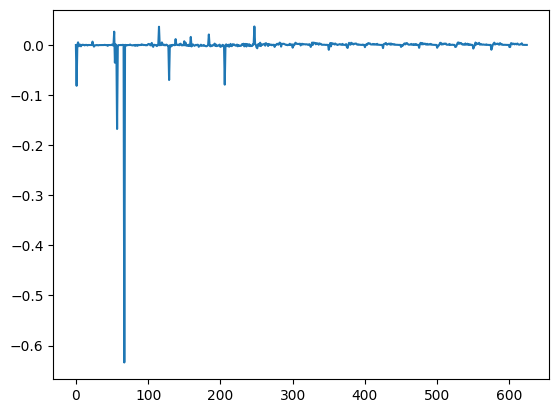

In [37]:
i=3
plt.plot(np.transpose(maes_50[names[i]])[2].T*(-1) - np.transpose(maes_200[names[i]])[2].T*(-1))
print((np.transpose(maes_50[names[i]])[2].T*(-1) - np.transpose(maes_200[names[i]])[2].T*(-1)).mean())